<a href="https://colab.research.google.com/github/1Light/Experimental-physics-lab/blob/main/Four%20Probe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


##Four Probe Method





In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pandas as pd

print("imported")

imported


In [3]:
df = pd.read_excel(r'/home/ashwin/Git/general-physics-lab/fourProbe/foreprobe.xlsx')
print(df)

        T    V_H   V_C   V_avg  Unnamed: 4  Unnamed: 5  Unnamed: 6   V_M  \
0    30.0  99.70  99.7  99.700         NaN        99.7       303.0  93.0   
1    35.0  76.20  76.2  76.200         NaN        76.2       308.0  93.0   
2    40.0  63.90  78.6  71.250         NaN        71.3       313.0  92.5   
3    45.0  51.10  64.3  57.700         NaN        57.7       318.0  91.0   
4    50.0  42.60  52.9  47.750         NaN        47.8       323.0  87.5   
5    55.0  36.30  43.6  39.950         NaN        40.0       328.0  82.5   
6    60.0  31.10  36.1  33.600         NaN        33.6       333.0  77.0   
7    65.0  26.60  30.3  28.450         NaN        28.5       338.0  70.5   
8    70.0  23.10  25.5  24.300         NaN        24.3       343.0  64.0   
9    75.0  19.80  21.7  20.750         NaN        20.8       348.0  57.5   
10   80.0  17.10  18.7  17.900         NaN        17.9       353.0  51.0   
11   85.0  14.80  15.9  15.350         NaN        15.4       358.0  45.0   
12   90.0  1

In [43]:
T=df['T_s'].to_numpy()
V=df['V_A_Sudarshan'].to_numpy()
#If you want to inclead some other valuesuse the name from table
#and to incled values after 10 or somthing put split =10
split=0

T_all=T[split:]+273
V_all=V[split:]*0.1*0.001

T=T_all[:22]
V=V_all[:22]



    Voltage (mV)   T (K)      rho_0   rho (Ohms.cm)      1/T          log_Rho
0            9.30     303  5.843362  10.54 +/- 1.46  3.30e-03   1.02 +/- 0.06
1            9.25     313  5.811946  10.48 +/- 1.45  3.19e-03   1.02 +/- 0.06
2            8.75     323  5.497787   9.91 +/- 1.36  3.10e-03    1.0 +/- 0.06
3            7.70     333  4.838053   8.72 +/- 1.17  3.00e-03   0.94 +/- 0.06
4            6.40     343  4.021239   7.25 +/- 0.96  2.92e-03   0.86 +/- 0.06
5            5.75     348  3.612832   6.52 +/- 0.85  2.87e-03   0.81 +/- 0.06
6            5.10     353  3.204425   5.78 +/- 0.75  2.83e-03   0.76 +/- 0.06
7            4.50     358  2.827433    5.1 +/- 0.66  2.79e-03   0.71 +/- 0.06
8            3.85     363  2.419026   4.36 +/- 0.56  2.75e-03   0.64 +/- 0.06
9            3.40     368  2.136283   3.85 +/- 0.49  2.72e-03   0.59 +/- 0.06
10           2.90     373  1.822124   3.29 +/- 0.42  2.68e-03   0.52 +/- 0.06
11           2.45     378  1.539380   2.78 +/- 0.35  2.65e-03   

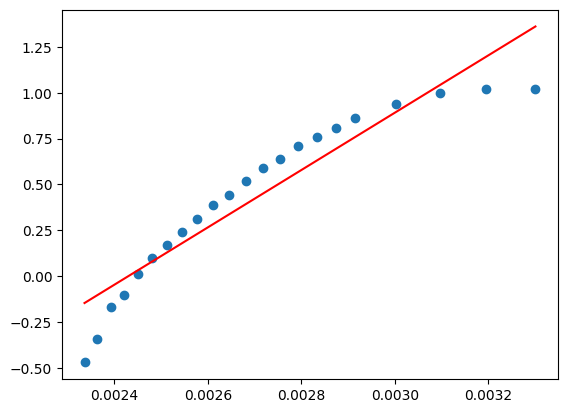

In [44]:
#T = [298.0, 308.0, 318.0, 328.0, 338.0, 348.0, 358.0, 368.0, 378.0, 388.0, 398.0, 408.0, 418.0, 428.0, 438.0] #in Kelvin
#V = [0.698, 0.662, 0.574, 0.46, 0.35, 0.261, 0.192, 0.142, 0.106, 0.081, 0.061, 0.048, 0.037, 0.03, 0.024]  #in Volts
I = 2.00 #mA

delta_V = 0.01 #V least count
delta_I = 0.1 #mA least count
delta_S = 0.1 #cm least count

S = 2.00 #mm
W = 4.00 #mm
t = 0.50 #mm

Length = 1.2 #cm
Breadth = 0.9 #cm

is_Condictive_bottom = False

###
'''
 Do not edit Consant below 
'''
###

Length = Length * pow(10,-2) #M
Breadth = Breadth * pow(10,-2) #M

k = 8.6E-5

I = I * pow(10,-3) #A
delta_I = 0.01 * pow(10,-3)
S = S * pow(10,-1)#cm
W = W * pow(10,-3) #M
t = t * pow(10,-3)  #M


G7 = 2 * np.log(2) * S / t 

def rho_0(V, I):
    #print ((V / I ) * 2 * np.pi * S)
    return (V / I ) * 2 * np.pi * S #100 forcm

def rho(V, I):
  return rho_0( V , I )  *10/G7

def F1():
    t_S = t/S
    if (is_Condictive_bottom):
        correction = t_S /( 2 * np.log(np.cosh(t_S) / np.cosh(t_S/2)))
        print("Doing Thickness effect correction for Condictive bottom ",correction)
    else:
        correction = t_S /( 2* np.log(np.sinh(t_S) / np.sinh(t_S/2)))
        print("Doing Thickness effect correction for Non Condictive bottom ",correction)
    return correction
 
def F0():
    t_S = t/S
    correction = t_S /( 2* np.log(2) )
    print("Doing Thickness effect correction for Non Condictive bottom ",correction)
    return correction
 
    
def F2() :
    d_S = Length / S
    if (Length >= 40* S):
        correction = 1
    else:
        correction = np.log(2) / ( np.log(2) + np.log( (d_S**2 + 3)/(d_S**2 - 3) ))
        print("Doing Lateral size effect correction ",correction)
    return correction
                                     
def F():
    return F1()*F2()

def DelRhoFn(rho_i , V  ):
    const =  2 * np.pi  #* F_correction 
    val = const * rho_i * np.sqrt( pow((S/delta_S),2)+pow((V/delta_V),2) + pow((delta_I / I ),2) )
    #print(pow((S/delta_S),2))
    return val

def DellogRhoFn(rho_i,V):
    val=DelRhoFn(rho_i , V )/rho_i
    return val

F_correction =1#*F()

Rho = []
T_1 = [] #10^-3
T_1_table=[]
log_Rho = [] 
srNo = []
RhoTable = []
delta_Rho = []
log_Rho_table=[]
rho_0_tab=[]
DelRhoFni=[]
for i in range(len(T)):
  srNo.append(i+1)
  rho_i = rho(V[i], I)
  rho_0_tab.append(rho_0(V[i], I))
  Rho.append( "{:.2e}".format(rho_i)  )

  delta_Rho.append(DelRhoFn(rho_i,V[i]))
  RhoTable.append( str(round(rho_i * 100 , 2)) + " +/- "+ str(round( DelRhoFn(rho_i,V[i]) ,2))) 
  DelRhoFni.append(round( DelRhoFn(rho_i,V[i]) ,2))
  T_1.append( 1 / T[i] )
  T_1_table.append( "{:.2e}".format(1 / T[i]) )
  log_Rho.append ( round(np.log10( rho_i*100),2 ))

  log_Rho_table.append ( str(round(np.log10( rho_i*100),2 )) + " +/- "+ str(round( DelRhoFn(rho_i,V[i]) /(np.log(10)*rho_i * 100) ,2)))
 

table = { #'Serial no ' :  srNo,
         'Voltage (mV) ': V*1000,
         'T (K) ': T,
         'rho_0':rho_0_tab,
         #'rho (Ohms.cm)': Rho,
         'rho (Ohms.cm)': RhoTable,
         #'Delta rho (Ohms.m)': delta_Rho,
         '1/T ': T_1_table,
         'log_Rho': log_Rho_table }

# log to base e is used and the Temp in Table is in terms of 10^-3

dataframe = pd.DataFrame(table)
print(dataframe)

result = linregress(T_1, log_Rho)

m = result.slope
b = result.intercept
delta_m = result.stderr 
#delta_b = result.intercept_stderr 


plt.scatter(T_1, log_Rho)
plt.plot(T_1, np.array(T_1) * m + b , color="red")  
print("Energy Band Gap in eV = " , round( 2.3026*10**3*2*8.617*10**-5 *10**-3* m,2))

In [45]:
round(1640.2378575523064*2.3026*10**3*2*8.617*10**-5,4)


650.8957

In [46]:
np.log10(11296.91)

4.052959668840564

In [47]:
0.2

0.2

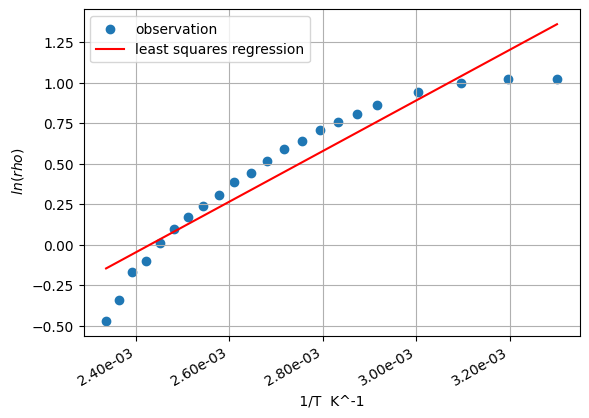

Energy Band Gap in eV = 0.62


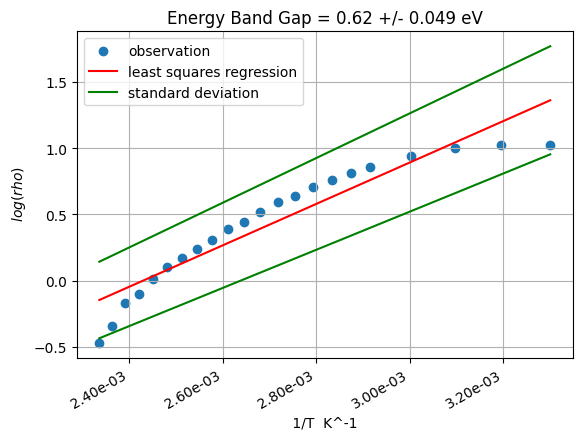

Energy Band Gap = 0.62 +/- 0.0491  eV


In [48]:
import matplotlib.ticker as mtick

fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(T_1, log_Rho,label = 'observation')
ax.plot(T_1, np.array(T_1) * m + b , color="red",label = 'least squares regression')
#ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))

ax.legend()
plt.xlabel(r" 1/T  K^-1 ")
plt.ylabel(r" $ln(rho)$")

fig.autofmt_xdate()
plt.grid("TRUE")
plt.show()

print("Energy Band Gap in eV =" , round(2.3026*10**3*2*8.617*10**-5 *10**-3* m ,2))


fig2 = plt.figure()

ay = fig2.add_subplot(111)


ay.scatter(T_1, log_Rho,label = 'observation')

ay.plot(T_1, np.array(T_1) * m + b , color="red",label = 'least squares regression')
ay.plot(T_1, np.array(T_1) * (m +delta_m ) + b , color="green",label = 'standard deviation')
ay.plot(T_1, np.array(T_1) * (m-delta_m) + b , color="green")



ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
ay.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))


plt.xlabel(r" 1/T  K^-1 ")
plt.ylabel(r" $log(rho)$")
fig2.autofmt_xdate()
plt.grid("TRUE")
plt.title("Energy Band Gap = {0} +/- {1} eV".format( round(2.3026*10**3*2*8.617*10**-5 *10**-3* m ,2), round(2.3026*10**3*2*8.617*10**-5 *10**-3*delta_m ,3) ))
ay.legend()
plt.show()

print("Energy Band Gap = {0} +/- {1}  eV".format( round(2.3026*10**3*2*8.617*10**-5 *10**-3* m ,2), round(2.3026*10**3*2*8.617*10**-5 *10**-3*delta_m ,4) ))

fig2.savefig("FigSlopeUnc.png")

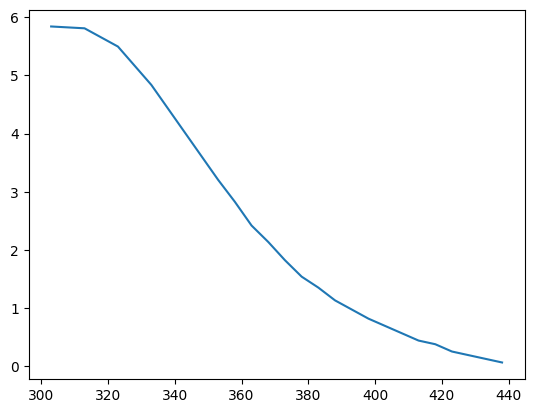

In [10]:
plt.plot(T,rho_0_tab)